# Data Exploration:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')



In [ ]:
#drop unwanted columns
unwanted_columns =["Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Market                        

# Preprocessing:-

In [ ]:
#checking for missing values
df = data.copy(deep=False)

percent_Miss = (df.isnull().sum() / len(df)) * 100
values_missing = df.isnull().sum()
missingValuesDf = pd.DataFrame({'missing values': values_missing,'percentMissing': percent_Miss})
missingValuesDf

,missing values,percentMissing
Type,0,0.0
Days for shipping (real),0,0.0
Days for shipment (scheduled),0,0.0
Benefit per order,0,0.0
Sales per customer,0,0.0
Delivery Status,0,0.0
Late_delivery_risk,0,0.0
Category Id,0,0.0
Category Name,0,0.0
Customer City,0,0.0


In [ ]:
# change object data into int or float

label_encoder = LabelEncoder()

columns_to_label_encode = ['Type','Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
                            'Customer State', 'Market', 'Order City', 'Order Country', 'Order Region',
                            'Order State', 'Order Status', 'Product Name', 'Shipping Mode']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,69,0,66,...,1,293.040008,284.250000,-44.630001,7,174,6,79,293.040008,3
1,2,2,4,87.180000,249.080002,0,0,69,0,66,...,1,293.040008,249.080002,87.180000,13,283,6,79,293.040008,3
2,1,3,2,105.489998,293.040008,1,1,69,0,66,...,1,293.040008,293.040008,105.489998,7,440,2,79,293.040008,2
3,1,2,2,25.270000,287.179993,3,0,69,0,66,...,1,293.040008,287.179993,25.270000,7,1002,2,79,293.040008,2
4,1,4,2,21.400000,243.220001,1,1,69,0,66,...,1,293.040008,243.220001,21.400000,15,114,2,79,293.040008,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  int64  
 9   Customer City                  180519 non-null  int64  
 10  Customer Country               180519 non-null  int64  
 11  Customer State                 180519 non-null  int64  
 12  Market                        

**Static summary**

In [ ]:
#get static summary
df.describe()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,1.675137,3.497654,2.931847,21.974989,183.107609,1.169256,0.548291,26.296966,193.954869,0.384297,...,2.127638,203.772096,183.107609,21.974989,12.128978,552.838538,3.886123,56.983171,141.232550,2.234806
std,0.994647,1.623722,1.374449,104.433526,120.043670,0.978838,0.497664,14.626845,160.939239,0.486430,...,1.453451,132.273077,120.043670,104.433526,6.983246,306.164791,2.260851,39.784692,139.732492,1.100920
min,0.000000,0.000000,0.000000,-4274.979980,7.490000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.990000,7.490000,-4274.979980,0.000000,0.000000,0.000000,0.000000,9.990000,0.000000
25%,1.000000,2.000000,2.000000,7.000000,104.379997,1.000000,0.000000,14.000000,66.000000,0.000000,...,1.000000,119.980003,104.379997,7.000000,6.000000,295.000000,2.000000,33.000000,50.000000,2.000000
50%,2.000000,3.000000,4.000000,31.520000,163.990005,1.000000,1.000000,23.000000,98.000000,0.000000,...,1.000000,199.919998,163.990005,31.520000,12.000000,530.000000,3.000000,41.000000,59.990002,3.000000
75%,3.000000,5.000000,4.000000,64.800003,247.399994,1.000000,1.000000,40.000000,324.000000,1.000000,...,3.000000,299.950012,247.399994,64.800003,18.000000,838.000000,6.000000,96.000000,199.990005,3.000000
max,3.000000,6.000000,4.000000,911.799988,1939.989990,3.000000,1.000000,49.000000,562.000000,1.000000,...,5.000000,1999.989990,1939.989990,911.799988,22.000000,1088.000000,8.000000,117.000000,1999.989990,3.000000


**Visualizations to check correlation:**

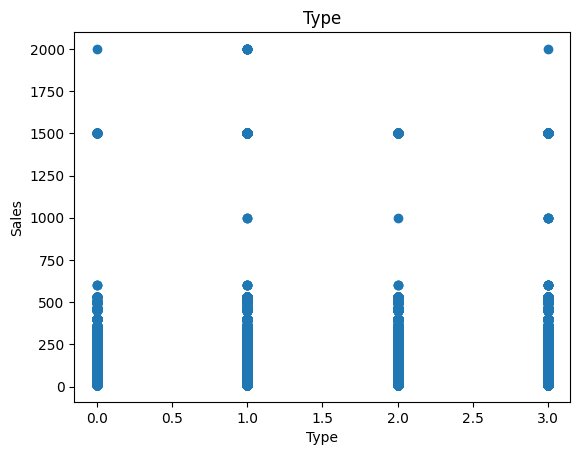

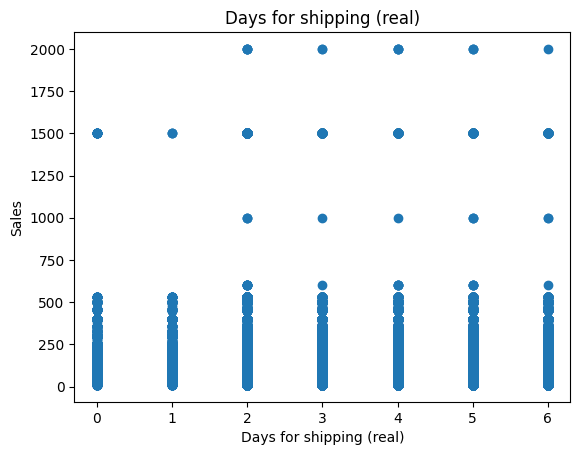

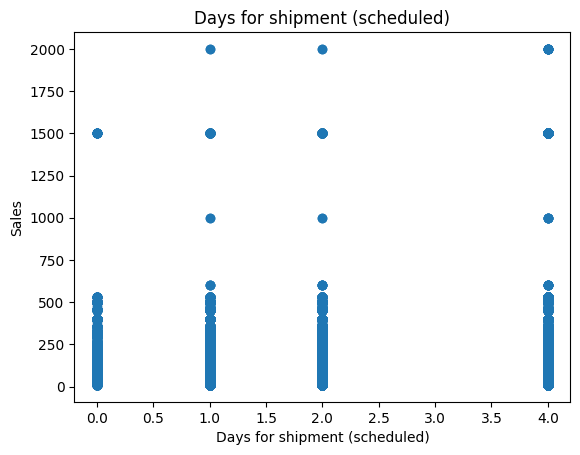

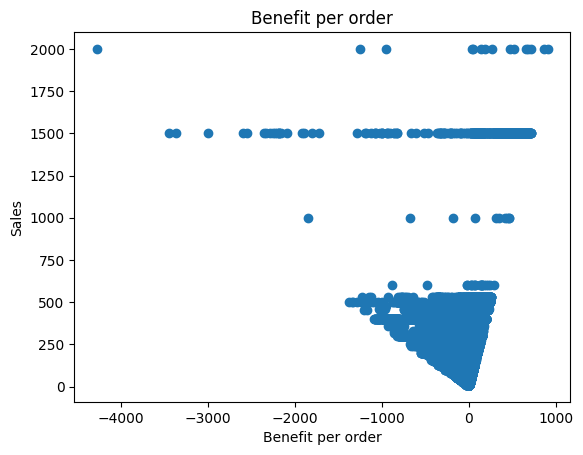

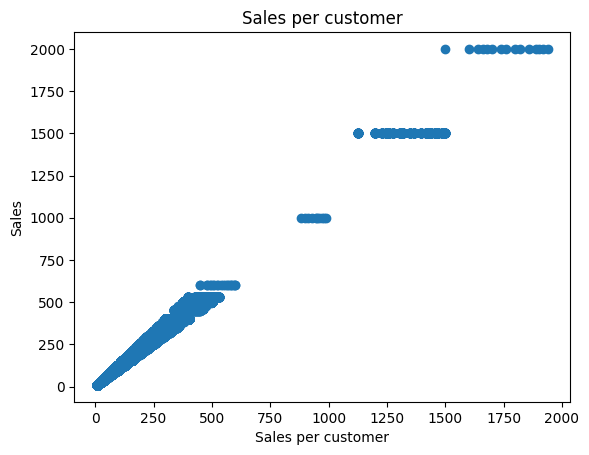

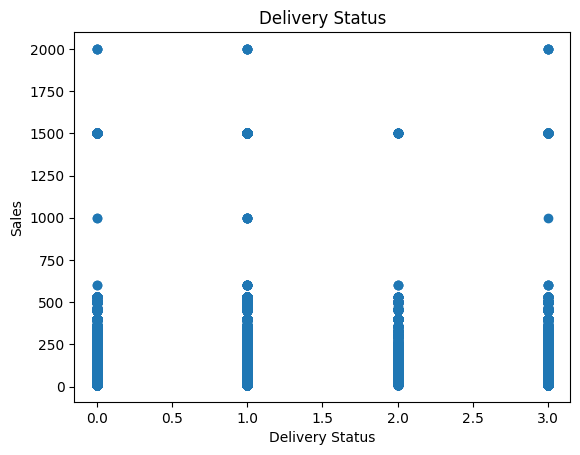

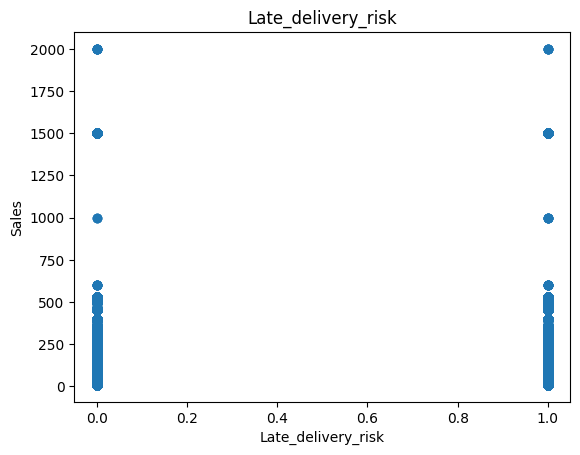

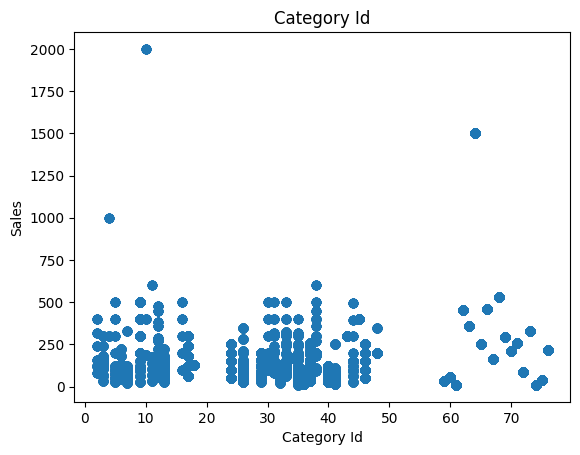

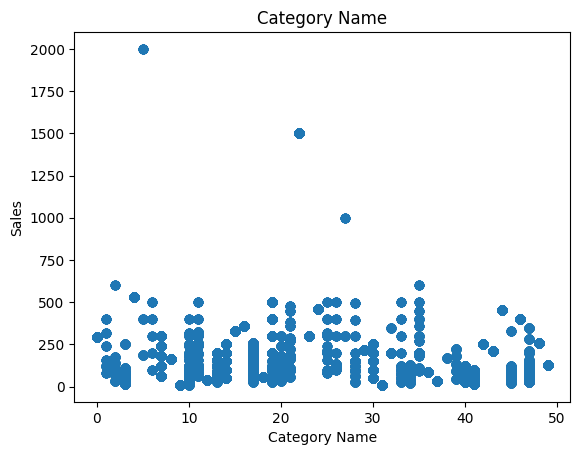

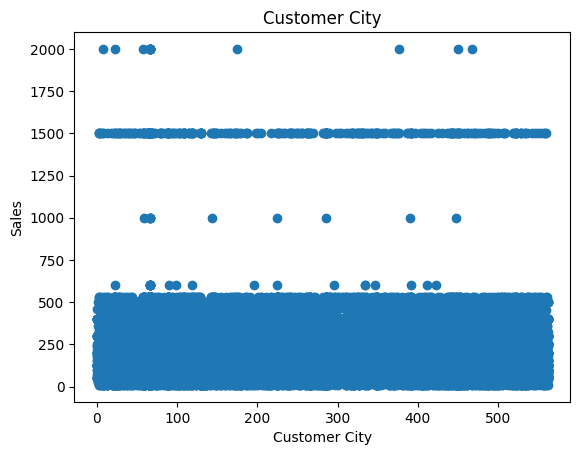

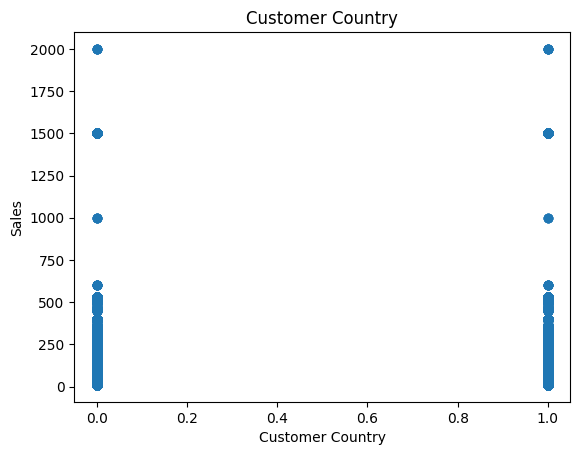

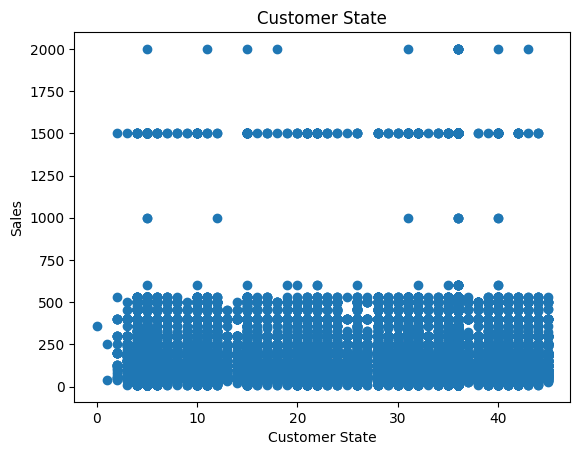

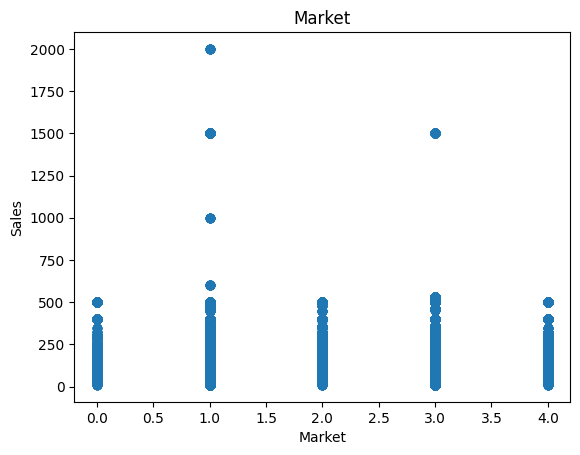

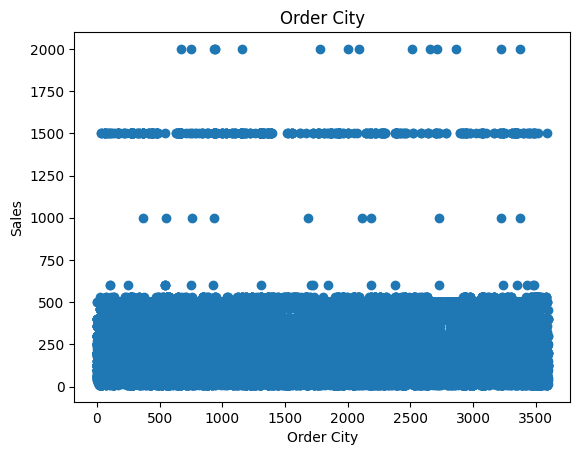

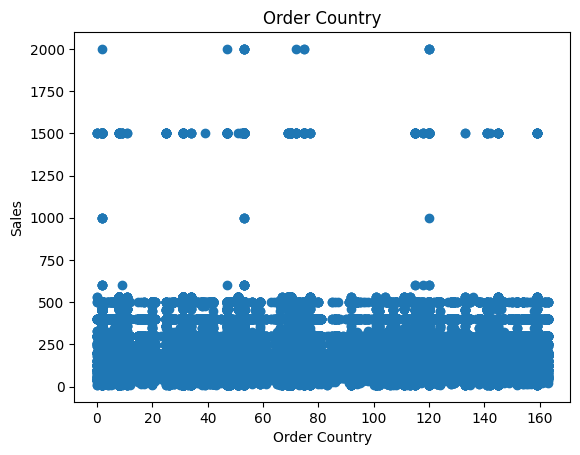

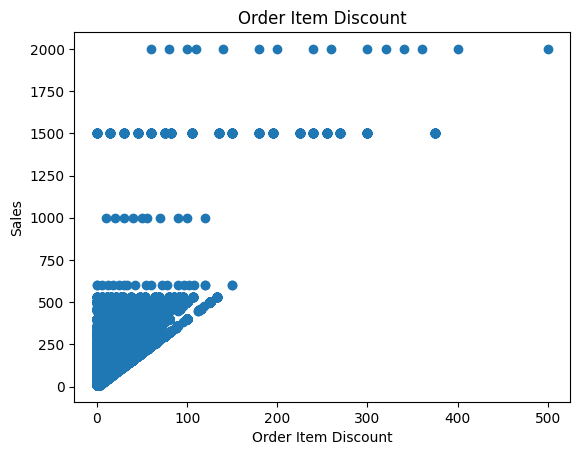

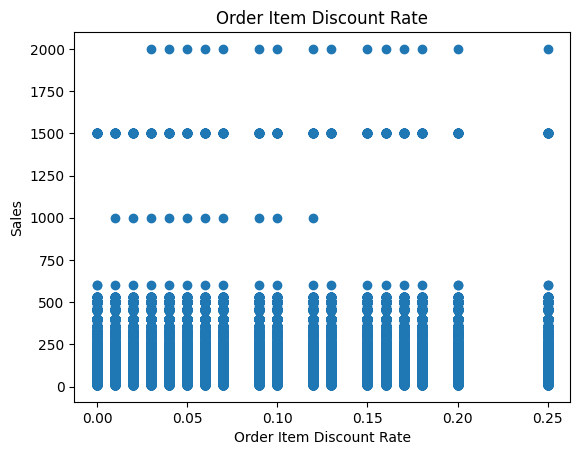

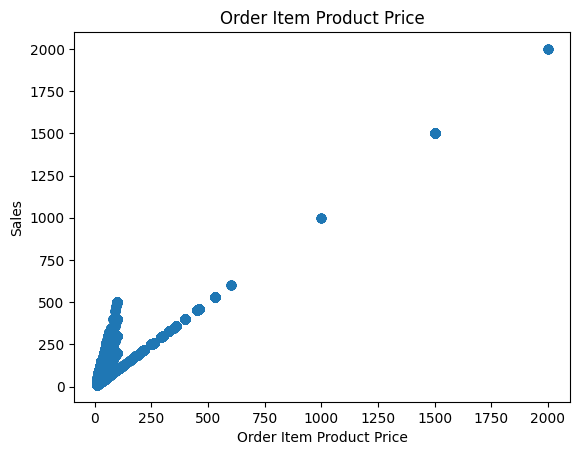

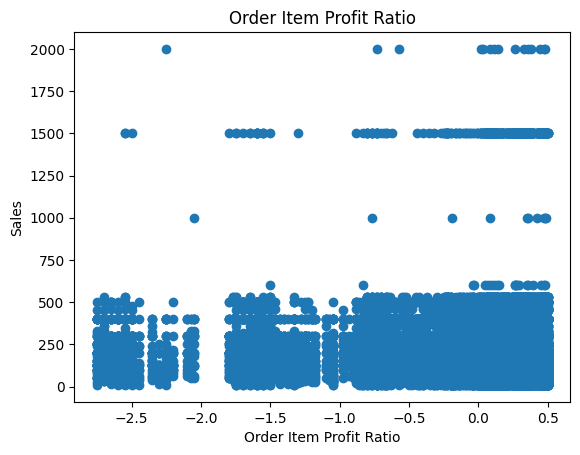

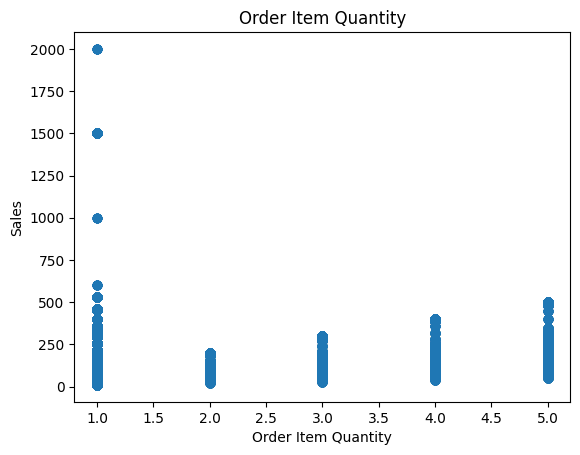

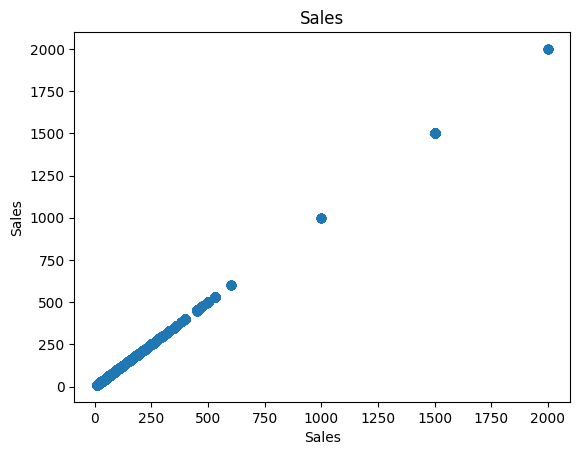

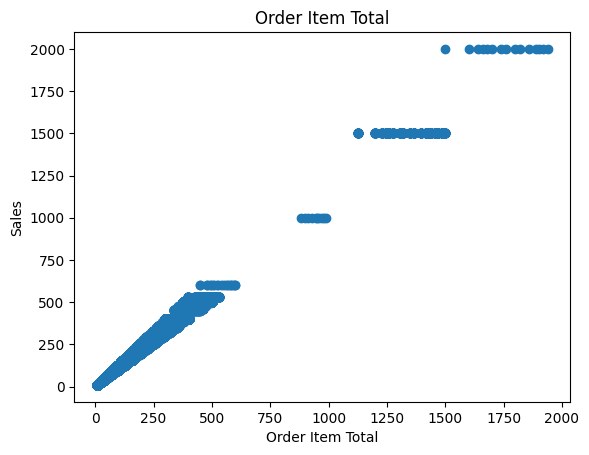

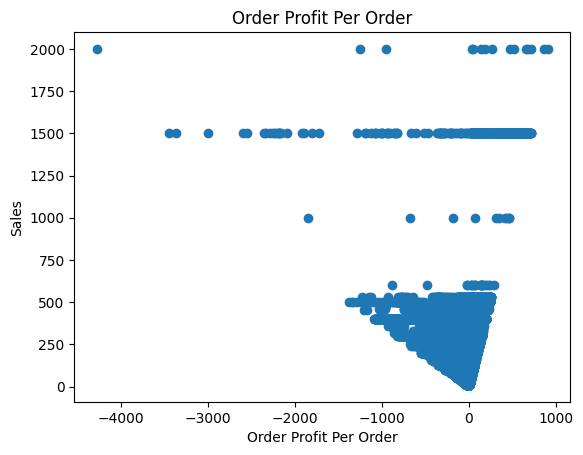

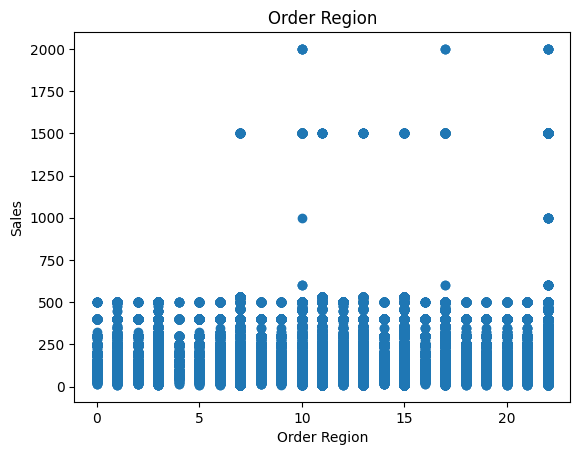

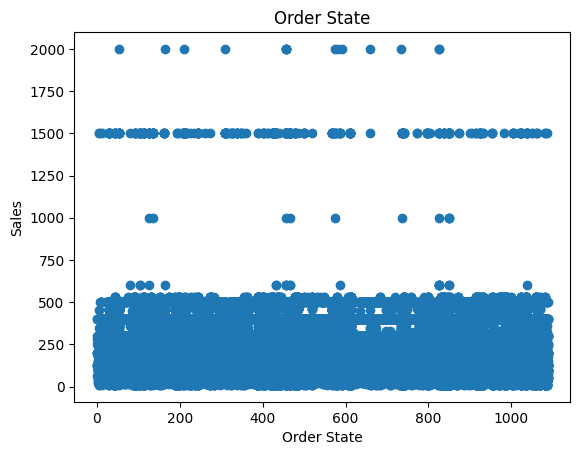

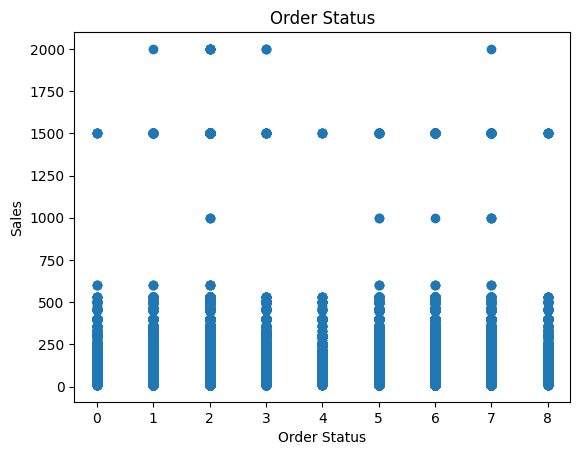

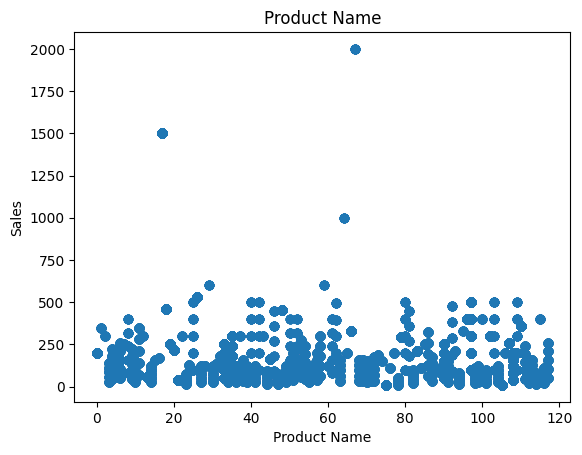

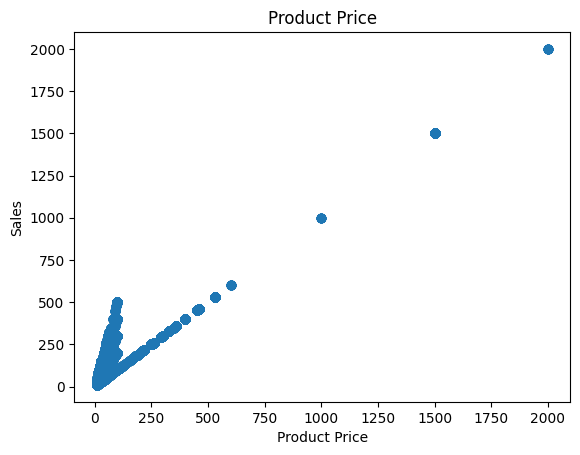

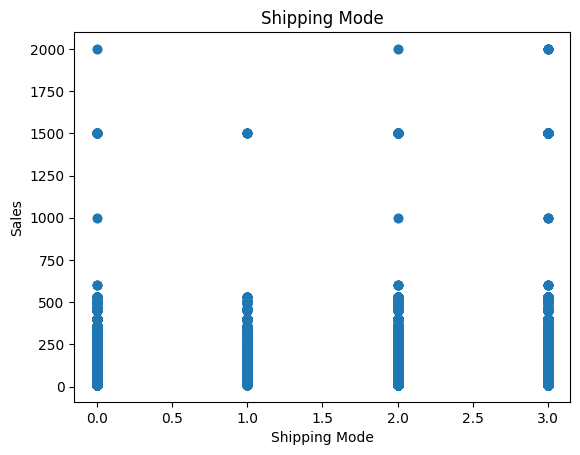

In [ ]:
for label in df.columns:
  plt.scatter(df[label],df["Sales"])
  plt.title(label)
  plt.ylabel("Sales")
  plt.xlabel(label)
  plt.show()

 **let's apply simple linear reg: for;
sales vs order item total,
sales vs product price.**

#Regression Model building:

**1)simple linear
x:oder item total(sales per customer is also same),y:sales**

In [ ]:
X = df[['Sales per customer']]
y = df['Sales']

# Split the data into training, validation, and test sets
X_train, X_oit, y_train, y_oit = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_oit, y_oit, test_size=0.5, random_state=42)


Mean Squared Error on Validation Set: 350.0000857488133
Mean Squared Error on Test Set: 359.0886226921225


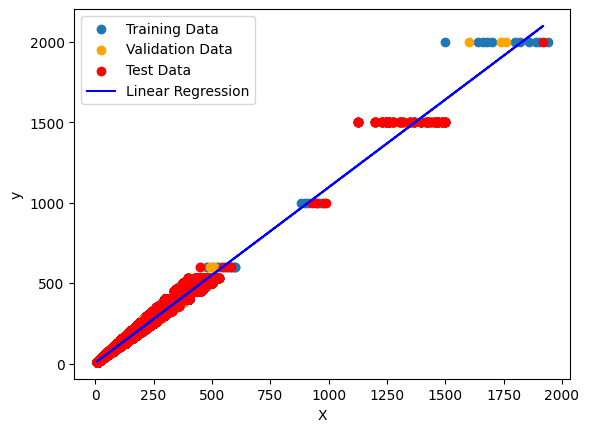

In [ ]:
# Train the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

# Plot the training data, validation data, test data, and regression lines
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_val, y_val, label='Validation Data', color='orange')
plt.scatter(X_test, y_test, label='Test Data', color='r')
plt.plot(X_test, y_test_pred, label='Linear Regression', color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared on Test Set: {r2_test}')

R-squared on Test Set: 0.9787839890775855


R^2->1.therefore this model is suitable for bi db.

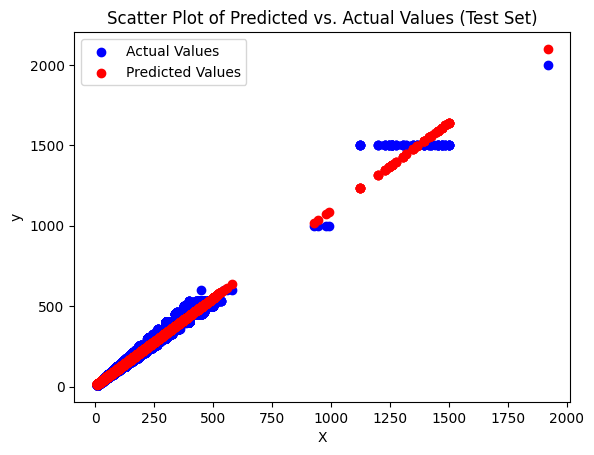

In [ ]:
# Plot the scatter plot of predicted vs. actual values for the test set
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.show()

Linear reg is suitable.

**2)simple linear
x:product price,y:sales**

In [ ]:
X2= df[['Product Price']]
y2 = df['Sales']

# Split the data into training, validation, and test sets
X_train2, X_pp, y_train2, y_pp = train_test_split(X2, y2, test_size=0.4, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_pp, y_pp, test_size=0.5, random_state=42)

Mean Squared Error on Validation Set: 6605.526775796793
Mean Squared Error on Test Set: 6418.15032359077


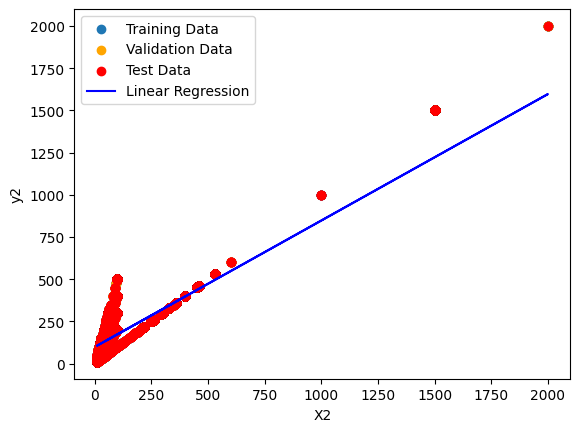

In [ ]:
# Train the linear regression model on the training set
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Make predictions on the validation set
y_val_pred2 = model2.predict(X_val2)

# Evaluate the model on the validation set
mse_val2 = mean_squared_error(y_val2, y_val_pred2)
print(f'Mean Squared Error on Validation Set: {mse_val2}')

# Make predictions on the test set
y_test_pred2 = model2.predict(X_test2)

# Evaluate the model on the test set
mse_test2 = mean_squared_error(y_test2, y_test_pred2)
print(f'Mean Squared Error on Test Set: {mse_test2}')

# Plot the training data, validation data, test data, and regression lines
plt.scatter(X_train2, y_train2, label='Training Data')
plt.scatter(X_val2, y_val2, label='Validation Data', color='orange')
plt.scatter(X_test2, y_test2, label='Test Data', color='r')
plt.plot(X_test2, y_test_pred2, label='Linear Regression', color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
r2_test2 = r2_score(y_test2, y_test_pred2)
print(f'R-squared on Test Set: {r2_test2}')

R-squared on Test Set: 0.6207968207231436


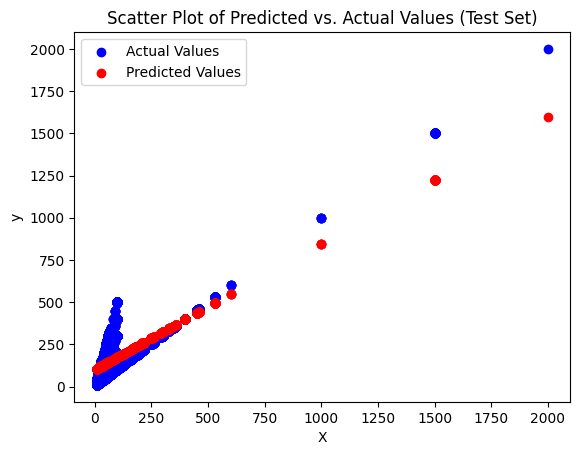

In [ ]:
# Plot the scatter plot of predicted vs. actual values for the test set
plt.scatter(X_test2, y_test2, color='blue', label='Actual Values')
plt.scatter(X_test2, y_test_pred2, color='red', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.show()

R-squared -> 0.62.Not very suitable.Therefore have to use another model.

**3)Muitiple linear x:all,y:sales**

In [ ]:
#drop category Id column
unwanted_column_Id =['Category Id']
df.drop(unwanted_column_Id, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

In [ ]:
# Assuming your dataset has features and a target column
X_all = df.drop('Sales', axis=1)  # Features (excluding the target 'Sales' column)
y_all = df['Sales']  # Target variable

# Split the data into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all,y_all , test_size=0.2, random_state=42)

# Train the multiple linear regression model
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_all)

# Evaluate the model
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print(f'Mean Squared Error on Test Set: {mse_all}')
print(f'R-squared on Test Set: {r2_all}')



Mean Squared Error on Test Set: 2.3810291253209614e-06
R-squared on Test Set: 0.9999999998594836


# Summary:

Usable for BI db:

*   simple linear for sales vs Order Item Total.
* multi -linear reg.

Not usable:


*   simple linear for sales vs pp.
*   List item







